In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import re
import igraph as ig
plt.style.use('ggplot')

In [19]:
hashtag = 'lgbt'

In [24]:
file_path = f'../data/hashtags/edges/{hashtag}_edges.txt'
try:
    G = nx.read_edgelist(file_path, delimiter=',', create_using=nx.DiGraph())
except FileNotFoundError:
    print(f"File not found: {file_path}")


In [25]:
print(G.nodes())

['https://www.tiktok.com/@thetylerherron/video/7375306205016755498', 'https://www.tiktok.com/@wigglyspine/video/7374384546621541664', 'https://www.tiktok.com/@matthewsplace1/video/7375302514322836782', 'None', 'https://www.tiktok.com/@jacklooman/video/7375300207849819435', 'https://www.tiktok.com/@lps_and_gacha_/video/7375286351031192878', 'https://www.tiktok.com/@bigbadgirlyman/video/7375299489583615274', 'https://www.tiktok.com/@rebelats0ul/video/7375001137881074986', 'https://www.tiktok.com/@ndirishclover/video/7375297629158214955', 'https://www.tiktok.com/@meghanley6/video/7370808509220343072', 'https://www.tiktok.com/@genericgaymerdude/video/7375286332123401505', 'https://www.tiktok.com/@byspencerthomas/video/7374964981382778158', 'https://www.tiktok.com/@snakebeasst69/video/7375278671193460011', 'https://www.tiktok.com/@chrisdmowrey/video/7374948759366569262', 'https://www.tiktok.com/@milo.g.official/video/7375267804401978657', 'https://www.tiktok.com/@tempestdaybreak/video/73752

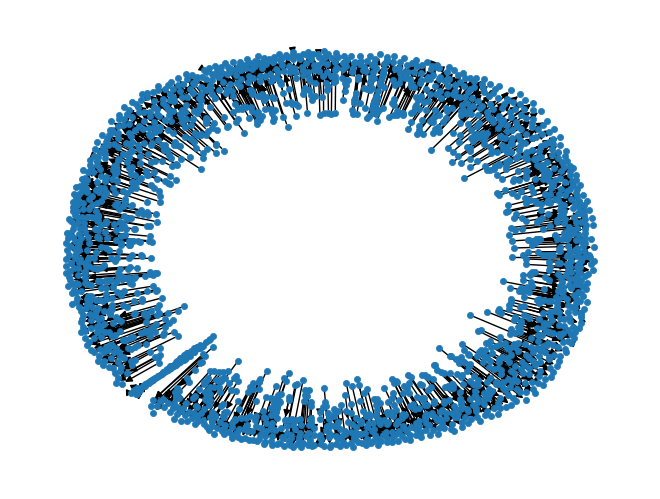

In [26]:
nx.draw_spring(G, node_size=20)

<BarContainer object of 16 artists>

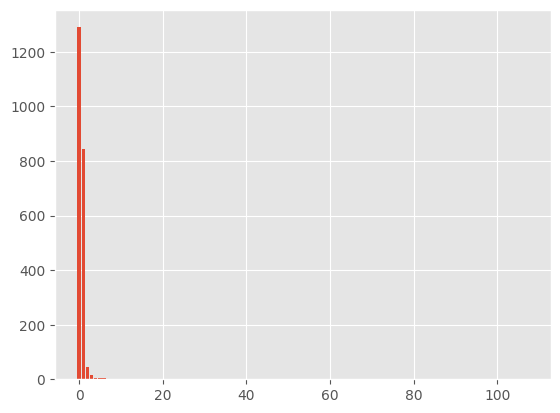

In [27]:
fig, ax = plt.subplots()
degree_sequence = degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))

In [28]:
np.unique(degree_sequence, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  13,  16,  17,
         24,  29, 107]),
 array([1290,  845,   46,   16,    3,    5,    4,    1,    1,    1,    2,
           1,    1,    1,    1,    1], dtype=int64))

In [29]:
largest_cc = max(nx.connected_components(nx.to_undirected(G)), key=len)

In [30]:
largest_cc

{'None',
 'https://www.tiktok.com/@2mummies/video/7372869316984737056',
 'https://www.tiktok.com/@adrunksailor/video/7370188482620296491',
 'https://www.tiktok.com/@andreia_sampaio93/video/7374126634300902688',
 'https://www.tiktok.com/@andreia_sampaio93/video/7374128748502748448',
 'https://www.tiktok.com/@aquarius_tv/video/7369609270683421998',
 'https://www.tiktok.com/@averagelez/video/7372980240357788971',
 'https://www.tiktok.com/@aysiainc/video/7371204739134147886',
 'https://www.tiktok.com/@badb1tchacademy/video/7364490804515065130',
 'https://www.tiktok.com/@better.call.hall/video/7367922724171271466',
 'https://www.tiktok.com/@bjornwildepress/video/7373722059286809899',
 'https://www.tiktok.com/@blacademics/video/7369056602659294506',
 'https://www.tiktok.com/@blk.boy.joy/video/7370508486414781742',
 'https://www.tiktok.com/@brandentrizz/video/7370095611196050731',
 'https://www.tiktok.com/@buckharder/video/7374119758037372202',
 'https://www.tiktok.com/@busdriver.planet.54/vi

In [32]:
with open(f'../data/hashtags/edges/{hashtag}_edges.txt', 'r') as f:
    edges_raw = f.readlines()

In [33]:
edges_url = [edge.strip().split(',') for edge in edges_raw if 'None' not in edge.strip().split(',')]

In [34]:
expression = re.compile(r'@[\w\d\.]+')
edges = []
for edge in edges_raw:
    try:
        stitcher, stitchee = edge.strip().split(',')
        stitcher = re.findall(expression, stitcher)[0]
        stitchee = re.findall(expression, stitchee)[0]
        edges.append((stitcher, stitchee))
    except IndexError:
        continue

In [44]:
edges.sort()

In [49]:
edges[20:50]

[('@a.is.for.alex', '@theryanjayshowofficial'),
 ('@a.lly.cat', '@nmillz1'),
 ('@a.shay.a', '@ohissabee'),
 ('@a_stonewall', '@revbrandanrobertson'),
 ('@accrualworld87', '@garythepokemontrainer'),
 ('@accrualworld87', '@hercules_noble_food'),
 ('@accrualworld87', '@jacoblucas101'),
 ('@accrualworld87', '@mittenkittenmi'),
 ('@accrualworld87', '@tylervitelli2'),
 ('@adamclayton_', '@adamclayton_'),
 ('@adamgaston', '@adamgaston'),
 ('@adamgaston', '@venicerunclub'),
 ('@againstwokeculture', '@dewiis.eurovisiion'),
 ('@aimhigh25', '@aimhigh25'),
 ('@aj_curious', '@sammy_fos'),
 ('@aj_igoe', '@2rawtooreal2'),
 ('@ajay.plants', '@ajay.plants'),
 ('@ajay.plants', '@plantzbab'),
 ('@ajay.plants', '@thewhorticulturist'),
 ('@aka.dr3', '@allyloru'),
 ('@alannastarby', '@accuweather'),
 ('@alannastarby', '@phips.y'),
 ('@alannastarby', '@wishbonekitchen'),
 ('@alex_tbc_soon', '@lillytino_'),
 ('@alexisgrimmart', '@tigbittysam'),
 ('@alexjakesc', '@ashleyteacozy'),
 ('@alexjakesc', '@bb_malloy'

In [269]:
# Load in transcription of hashtag
with open(f'../data/hashtags/videos/transcriptions/{hashtag}.txt', 'r') as f:
    transcription = f.readlines()

In [270]:
#for every four lines in transcription, remove the first and fourth lines
transcription = [line for i, line in enumerate(transcription) if i % 4 != 0]


In [271]:
#remove every third line
transcription = [line for i, line in enumerate(transcription) if i % 3 != 2]

In [272]:
#strip the part of every second line, beginning with the first line, for 'Video: ', still keeping the rest of the line and list
transcription = [line.split('Video: ')[1].strip() if i % 2 != 1 and 'Video: ' in line else line for i, line in enumerate(transcription)]
#the same but if the line contains '_video_' remove the part after that including '_video_'
transcription = [line.split('_video_')[0].strip() if i % 2 != 1 and '_video_' in line else line for i, line in enumerate(transcription)]

In [273]:
transcription

['@.autarex',
 " She was like, I don't know. I don't know. I don't know. I don't know.\n",
 '@.autarex',
 ' you\n',
 '@0316amberlicious',
 ' Mon BUTCH sense.\n',
 '@0316amberlicious',
 " i have helped the school I'vegat al done I'm quite happy I hope to introduce something here\n",
 '@0ctober.bby',
 " We'll be talking about the have to go see a man about a horse. What is the lesbian version of it?\n",
 '@0ctober.bby',
 " I gotta go sit a woman a carpet. That's it right there. Uh, you guys your friends. I'm talking to you. I gotta go sit a woman a carpet.\n",
 '@12amcoconut',
 '\n',
 '@12amcoconut',
 " Congratulations on the person you got to become from those experiences. Congratulations on the feelings you wouldn't have felt without going through what you go through now and what you went through before. Congratulations on the current opportunity of showing a positive way of how strong you can be and how strong others can be in moments like this. Congratulations on feeling whole with a

In [274]:
#remove \n from each line
transcription = [i.strip() for i in transcription]

In [275]:
transcription[80:100]

['@adamgaston',
 "Hi, my name is you. Are you single Ian? It's complicated.",
 '@adamgaston',
 "Honestly, I'm just going to dial on. At this point, it's simple. It's not complicated. It's going to dial on.",
 '@adamgaston',
 'Okay, so you know how men reading is really attractive? I know the bar is really low',
 '@adamgaston',
 'I just learned Amazon is doing like a major sale on books so you know if anybody think it would be hot to see me read. Feel free to buy me books off of my Amazon wishlist just',
 '@adrunksailor',
 'Gay is a sin.',
 '@adrunksailor',
 "Yeah, so is getting attached to a premarital second. So, if Jesus died for our sins and being gay is a sin, then with that math didn't Jesus die for the gays?",
 '@againstwokeculture',
 'I',
 '@againstwokeculture',
 "It's hardly surprise that we did so badly at your vision again. So that performance from Ollie Alexander, it was absolutely appalling. I mean it wasn't the worst of the night that surely has to go to Ireland, but someh

In [276]:
#replace the transciptions with the sentiment from the sentiment analysis
with open(f'../data/hashtags/videos/sentiments/{hashtag}_sentiment.txt', 'r') as f:
    sentiments = f.readlines()

sentiments = [i.strip() for i in sentiments]

sentiments[:6]

['0 positive',
 '1 neutral',
 '2 neutral',
 '3 positive',
 '4 neutral',
 '5 positive']

In [277]:
len(sentiments)

2536

In [278]:
from natsort import os_sorted

edges = os_sorted(edges)

In [279]:
len(transcription)/2

2536.0

In [280]:
#sort trans

In [281]:
transcription[1]

"She was like, I don't know. I don't know. I don't know. I don't know."

In [282]:
#replace every second line of transciption with the sentiment from sentiments
for i in range(0, len(transcription)):
    transcription[i*2+1] = sentiments[i]

IndexError: list index out of range

In [283]:
transcription[-20:]

['@_lorimusic',
 '2526 neutral',
 '@_lorimusic',
 '2527 positive',
 '@_piercedthrutheheart_',
 '2528 negative',
 '@_piercedthrutheheart_',
 '2529 positive',
 '@_princess_opossum',
 '2530 positive',
 '@_princess_opossum',
 '2531 positive',
 '@_tatted.ginger_',
 '2532 neutral',
 '@_tatted.ginger_',
 '2533 positive',
 '@___slater',
 '2534 positive',
 '@___slater',
 '2535 positive']

In [284]:
t = transcription
t= os_sorted(t)

In [285]:
t[:20]

['@.autarex',
 '@.autarex',
 '@___slater',
 '@___slater',
 '@_callmelars',
 '@_callmelars',
 '@_junaluv_',
 '@_junaluv_',
 '@_lorimusic',
 '@_lorimusic',
 '@_piercedthrutheheart_',
 '@_piercedthrutheheart_',
 '@_princess_opossum',
 '@_princess_opossum',
 '@_tatted.ginger_',
 '@_tatted.ginger_',
 '@0ctober.bby',
 '@0ctober.bby',
 '@2mummies',
 '@2mummies']

In [286]:
edges[:10]

[('@.autarex', '@777ayonna'),
 ('@___slater', '@bran__flakezz'),
 ('@_callmelars', '@bnktalks'),
 ('@_junaluv_', '@fuku.zawas'),
 ('@_lorimusic', '@_lorimusic'),
 ('@_motivatedki', '@kehlani'),
 ('@_piercedthrutheheart_', '@melaniecryk12portals'),
 ('@_princess_opossum', '@tillyoddyblack'),
 ('@_tatted.ginger_', '@conservativeant2.0'),
 ('@0bsidian____', '@bambinoootalks')]

In [287]:
#check if the edges are in the transcription
count = 0
for edge in edges:
    if edge[0] not in t:
        print(edge[0])
        count += 1
print(count)

@_motivatedki
@0bsidian____
@0bsidian____
@arianemitchellxox
@benderella69
@blackiee_sky
@charlotty781
@chloberryshortcake
@lucy.yeaman
@perfectlyimperfect.steph
@prettygworlmal
@rlegge11
@scarycute13
@shaun15here
@tik.char.tok
@tyvegan
16


In [288]:
edges[:10]

[('@.autarex', '@777ayonna'),
 ('@___slater', '@bran__flakezz'),
 ('@_callmelars', '@bnktalks'),
 ('@_junaluv_', '@fuku.zawas'),
 ('@_lorimusic', '@_lorimusic'),
 ('@_motivatedki', '@kehlani'),
 ('@_piercedthrutheheart_', '@melaniecryk12portals'),
 ('@_princess_opossum', '@tillyoddyblack'),
 ('@_tatted.ginger_', '@conservativeant2.0'),
 ('@0bsidian____', '@bambinoootalks')]

In [289]:
transcription[:10]

['@.autarex',
 '0 positive',
 '@.autarex',
 '1 neutral',
 '@0316amberlicious',
 '2 neutral',
 '@0316amberlicious',
 '3 positive',
 '@0ctober.bby',
 '4 neutral']

In [35]:
G_video = ig.Graph().as_directed()
for s, t in edges_url:
    G_video.add_vertex(s)
    G_video.add_vertex(t)
    G_video.add_edge(s, t)

In [36]:
components = G_video.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 2]
G_video_sub = G_video.subgraph(sum(components_filtered, []))

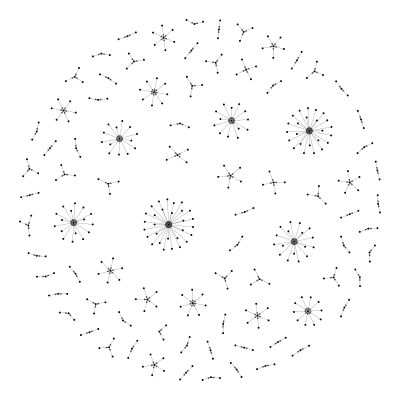

In [37]:
ig.plot(
    G_video_sub, 
    layout=G_video_sub.layout('fr'), 
    vertex_size=1, 
    edge_width=.2, 
    edge_arrow_size=0.2,
    bbox=(0, 0, 400, 400),
)

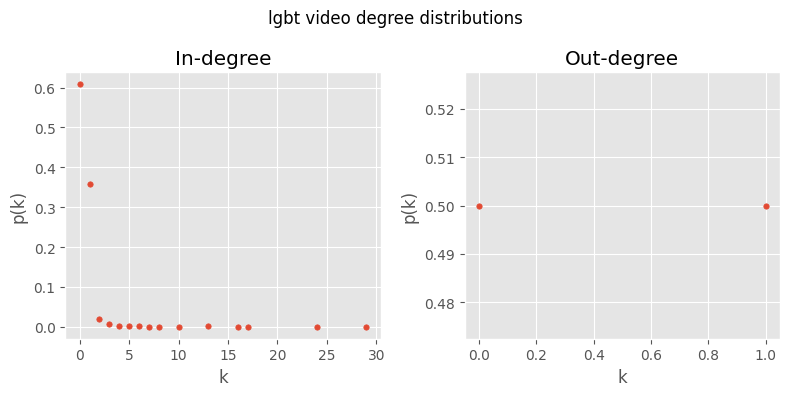

In [38]:
in_degrees = G_video.indegree()
out_degrees = G_video.outdegree()

# get frequency of each degree and normalize to density
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()

dot_size = 15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 4])
fig.suptitle(f'{hashtag} video degree distributions')

# plot in-degree
ax1.scatter(d_in, v_in, s=dot_size)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
ax1.set_title('In-degree')

# plot out-degree
ax2.scatter(d_out, v_out, s=dot_size)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Out-degree')

plt.tight_layout()

In [39]:
G_user = ig.Graph().as_directed()
for s, t in edges:
    G_user.add_vertex(s)
    G_user.add_vertex(t)
    G_user.add_edge(s, t)

In [40]:
components = G_user.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 2]
G_user_sub = G_user.subgraph(sum(components_filtered, []))

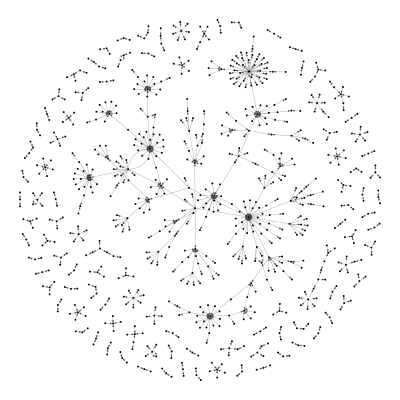

In [41]:
ig.plot(
    G_user_sub, 
    layout=G_user_sub.layout('fr'), 
    vertex_size=1, 
    edge_width=.2, 
    edge_arrow_size=0.2,
    bbox=(0, 0, 400, 400),
)

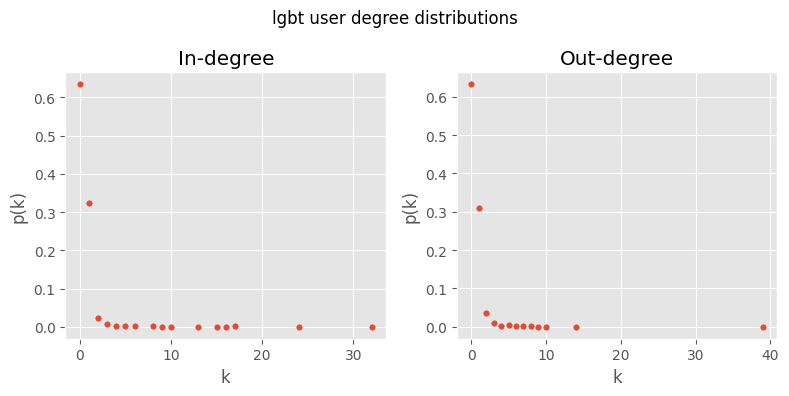

In [42]:
in_degrees = G_user.indegree()
out_degrees = G_user.outdegree()

# get frequency of each degree and normalize to density
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()

dot_size = 15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 4])
fig.suptitle(f'{hashtag} user degree distributions')

# plot in-degree
ax1.scatter(d_in, v_in, s=dot_size)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
ax1.set_title('In-degree')

# plot out-degree
ax2.scatter(d_out, v_out, s=dot_size)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Out-degree')

plt.tight_layout()